1


In [6]:
pip install Faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import random
from faker import Faker
import datetime

np.random.seed(42)

num_samples = 100

# Generate Employee IDs (unique identifiers)
employee_ids = [str(i) for i in range(1, num_samples + 1)]

# Generate Employee Names (text data)
fake = Faker()
employee_names = [fake.name() for _ in range(num_samples)]

# Generate Departments (categorical)
departments = ['Sales', 'Marketing', 'Engineering', 'HR', 'Finance', 'IT']
employee_departments = [random.choice(departments) for _ in range(num_samples)]

# Generate Salaries (numerical)
employee_salaries = np.random.randint(30000, 90000, size=num_samples)

# Generate Joining Dates (date or datetime)
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2023, 1, 1)
employee_joining_dates = [fake.date_between_dates(start_date, end_date).strftime('%Y-%m-%d') for _ in range(num_samples)]

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Employee ID': employee_ids,
    'Employee Name': employee_names,
    'Department': employee_departments,
    'Salary': employee_salaries,
    'Joining Date': employee_joining_dates
})

# Add missing values to the dataset (you can customize the missing value pattern)
missing_value_prob = 0.1  # 10% of data will have missing values

for column in data.columns:
    data[column] = data[column].apply(lambda x: np.nan if random.random() < missing_value_prob else x)

# Print the first few rows of the dataset
print(data.head())


  Employee ID      Employee Name Department   Salary Joining Date
0         NaN     Eugene Bonilla         IT  86422.0   2015-10-18
1         NaN       Eric Buckley      Sales  45795.0   2022-10-18
2           3  Danielle Petersen         HR  30860.0   2017-09-24
3         NaN   Matthew Martinez      Sales  68158.0   2021-04-05
4           5       Angela Mccoy         HR  84343.0   2014-02-04


2


In [9]:
import pandas as pd

# Assuming you have already created the 'data' DataFrame as shown in the previous code

# Count the missing values in each column
missing_count = data.isnull().sum()

# Calculate the percentage of missing values in each column
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column Name': data.columns,
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

print(missing_info)


                 Column Name  Missing Count  Missing Percentage
Employee ID      Employee ID             18                18.0
Employee Name  Employee Name             10                10.0
Department        Department              8                 8.0
Salary                Salary             10                10.0
Joining Date    Joining Date              7                 7.0


3

<Axes: >

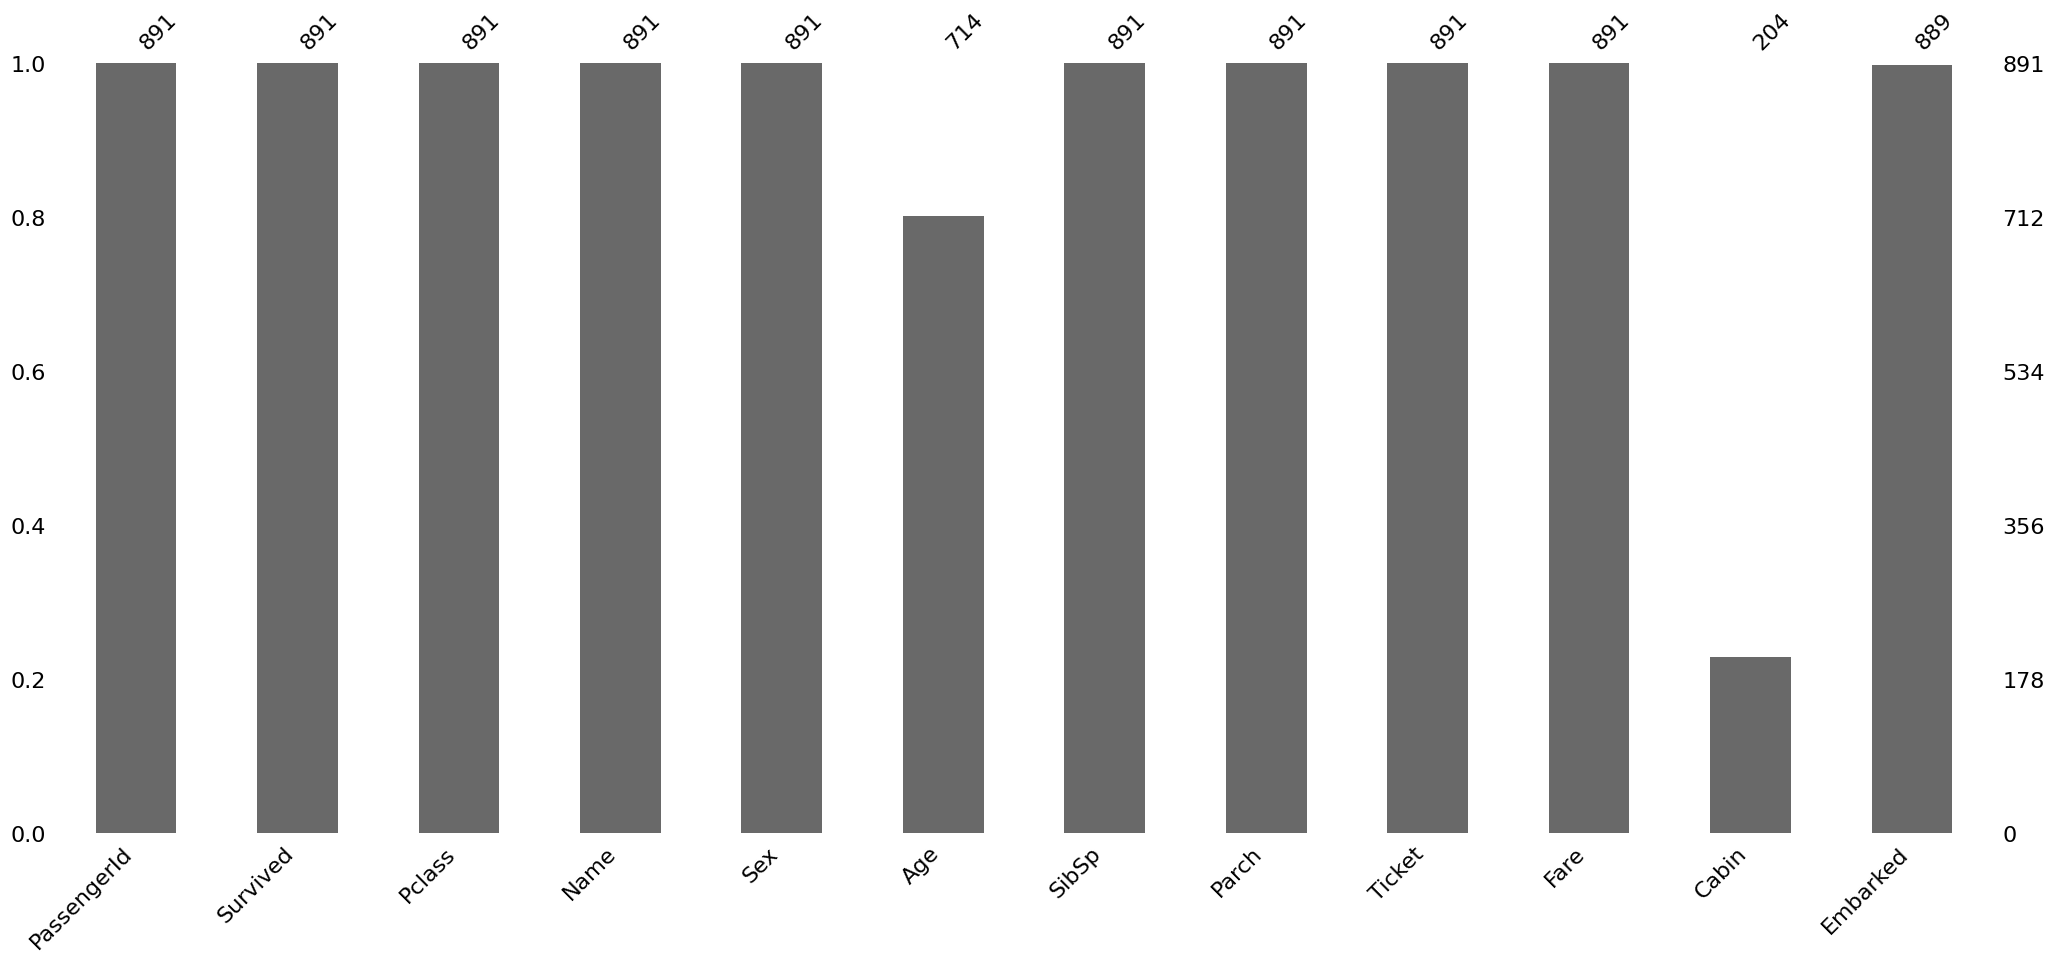

In [11]:
import pandas as pd
import missingno as msno

# Load the Titanic dataset into a Pandas DataFrame
# Replace 'titanic_dataset.csv' with the actual file path if it's in a different location
titanic_data = pd.read_csv('/content/sample_data/titanic.csv')

# Visualize missing values with a bar chart
msno.bar(titanic_data)


4

In [12]:
import pandas as pd

# Assuming you have already loaded the Titanic dataset into a DataFrame named 'titanic_data'

# Create a copy of the DataFrame
titanic_data_copy = titanic_data.copy()

# Drop rows with missing values in the 'Fare' column
titanic_data_copy.dropna(subset=['Fare'], inplace=True)

# Now, 'titanic_data_copy' contains the DataFrame with rows that have no missing values in the 'Fare' column


5


In [13]:
import pandas as pd

most_frequent_cabin = titanic_data['Cabin'].mode()[0]

# Replace missing values in the 'Cabin' column with the most frequent value
titanic_data['Cabin'].fillna(most_frequent_cabin, inplace=True)


6


In [34]:
most_common_embarked = titanic_data_copy['Embarked'].mode()[0]
titanic_data_copy['Embarked'].fillna(most_common_embarked, inplace=True)


7

In [15]:
import numpy as np
from sklearn.impute import KNNImputer

# Assuming you have already loaded the Titanic dataset into a DataFrame named 'titanic_data'

# Extract the "Age" column as a 1D array
age_data = titanic_data['Age'].values.reshape(-1, 1)

# Create a KNN Imputer with the desired number of neighbors and weights
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Fit and transform the "Age" column to impute missing values
titanic_data['Age'] = imputer.fit_transform(age_data)

# Now, the missing values in the "Age" column have been imputed using KNN imputation


8

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming you have already loaded the Titanic dataset into a DataFrame named 'titanic_data'

# Create a deep copy of the 'titanic_data' DataFrame
titanic_data_mice = titanic_data.copy(deep=True)

# Enable the IterativeImputer
enable_iterative_imputer

# Create an instance of the IterativeImputer
mice_imputer = IterativeImputer()

# Replace 'body' with the correct column name in your dataset
titanic_data_mice['Age'] = mice_imputer.fit_transform(titanic_data_mice[['Age']])


# Now, the 'body' column in 'titanic_data_mice' has missing values imputed based on multivariate feature imputation


9.a)

In [17]:
import numpy as np
import pandas as pd

data = {
    "X1": [np.nan, "Red", "Blue", "Red", np.nan, "Red", "Green", np.nan, "Blue", "Red"],
    "X2": ["Green", "Green", "Red", "Blue", "Green", "Blue", np.nan, "Red", "Green", np.nan]
}

colors = pd.DataFrame(data)
print(colors)


      X1     X2
0    NaN  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    NaN  Green
5    Red   Blue
6  Green    NaN
7    NaN    Red
8   Blue  Green
9    Red    NaN


9.b)

In [18]:
# For each column, get value counts in decreasing order and take the index (value) of the most common class
df_most_common_imputed = colors.apply(lambda x: x.fillna(x.value_counts().idxmax()))
print(df_most_common_imputed)


      X1     X2
0    Red  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    Red  Green
5    Red   Blue
6  Green  Green
7    Red    Red
8   Blue  Green
9    Red  Green


9.c)

In [19]:
df_unknown_imputed = colors.fillna("Unknown")
print(df_unknown_imputed)


        X1       X2
0  Unknown    Green
1      Red    Green
2     Blue      Red
3      Red     Blue
4  Unknown    Green
5      Red     Blue
6    Green  Unknown
7  Unknown      Red
8     Blue    Green
9      Red  Unknown


9.d)

In [20]:
for column in colors.columns:
    mode_value = colors[column].mode()[0]
    colors[column].fillna(mode_value, inplace=True)

print(colors)


      X1     X2
0    Red  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    Red  Green
5    Red   Blue
6  Green  Green
7    Red    Red
8   Blue  Green
9    Red  Green


**Exercise III Remove Noise from Data **


1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Load the dataset
df = pd.read_csv('/content/sample_data/cupcake.csv')

2.a)

In [22]:
# Binning by distance
min_val = df['Cupcake'].min()
max_val = df['Cupcake'].max()

2.b)

In [32]:
bins = np.linspace(min_val, max_val, 4)
bins

array([  4.,  36.,  68., 100.])

2.c)

In [24]:
labels = ['small', 'medium', 'big']

2.d)

In [25]:
df['Cupcake_binned_distance'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)

2.e)

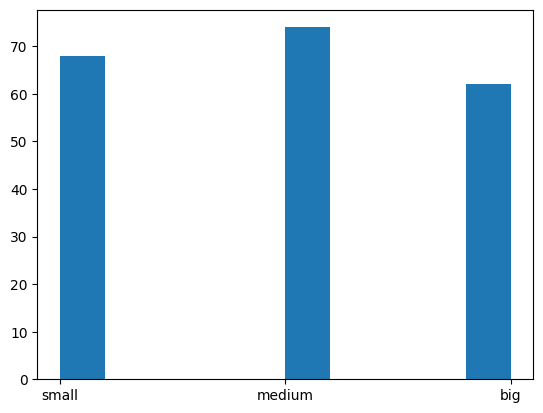

In [26]:
plt.hist(df['Cupcake_binned_distance'])
plt.show()

3.

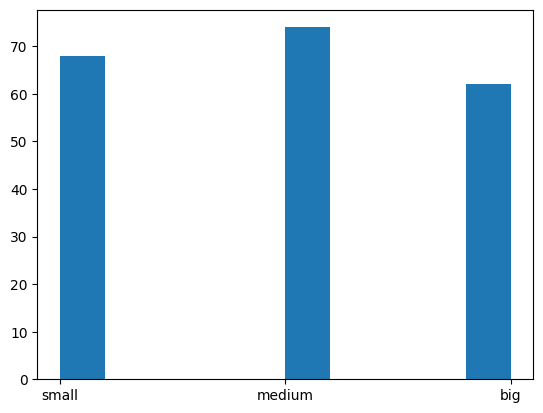

In [27]:
df['Cupcake_binned_frequency'] = pd.qcut(df['Cupcake'], q=4)

plt.hist(df['Cupcake_binned_distance'])
plt.show()

4.a)


In [30]:
from scipy.stats import binned_statistic
bins = np.linspace(min_val, max_val, 5)
def set_to_mean(x):
    bin_means, _, _ = binned_statistic(x, x, statistic='mean', bins=bins)
    return bin_means
def set_to_median(x):
    bin_medians, _, _ = binned_statistic(x, x, statistic='median', bins=bins)
    return bin_medians
def set_to_boundary(x):
    bin_boundaries, _, _ = binned_statistic(x, x, statistic='max', bins=bins)
    return bin_boundaries



4.b)

In [33]:
df['Cupcake_Bin_Mean'] = df.groupby(pd.cut(df['Cupcake'], bins=bins, include_lowest=True))['Cupcake'].transform(lambda x: set_to_mean(x))
df['Cupcake_Bin_Median'] = df.groupby(pd.cut(df['Cupcake'], bins=bins, include_lowest=True))['Cupcake'].transform(lambda x: set_to_median(x))
df['Cupcake_Bin_Boundary'] = df.groupby(pd.cut(df['Cupcake'], bins=bins, include_lowest=True))['Cupcake'].transform(lambda x: set_to_boundary(x))


ValueError: ignored